In [1]:
import geopandas as gpd
import gzip
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import pandas as pd
import rasterio
from rasterio import mask
from rasterio.enums import Resampling
import seaborn as sns
from shapely.geometry import box, mapping
import shutil
import statsmodels.api as sm
import tqdm
import urllib.request
import rasterio as rio


# Get the demographics data 

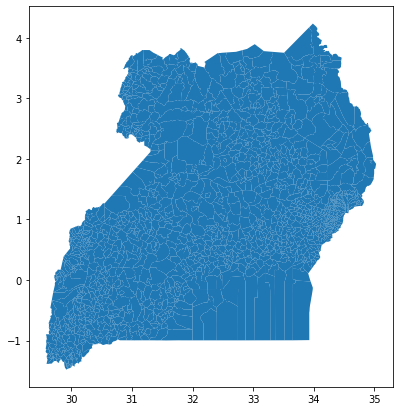

In [2]:
# Use shapefile of 
admin3_path = '../Data/Mapping layout/Admin3/uga_admbnda_adm3_UBOS_v5_cleaned [CB].shp'
# admin3_path = "data/Admin3/uga_admbnda_adm3_UBOS_v5_cleaned.shp" #Path for Nancy's machine
admin3_df = gpd.read_file(admin3_path)
admin3_df.plot(figsize=(12,7))

In [3]:
# declare masking function
def mask_raster(raster_path, shape, indexes=1, crop=True, nodata=-9999):
    with rio.open(raster_path) as raster:
        out_data, out_transform = rio.mask.mask(raster, [shape], indexes=indexes, crop=crop, nodata=nodata)
        out_meta = raster.meta
    return (out_data, out_transform, out_meta)

# Those [] around shapes are needed for it to be iterable > to clarify 

In [4]:
#loop through the shapefile computing age for each polygon
def get_data(shape_df, file):
    total = []
    for shape in admin3_df['geometry']:
        out_data, _, _ = mask_raster(file, shape)
        values = out_data.flatten()[out_data.flatten() > 0]
        if values.size == 0:
            values = np.nan
        total.append(np.sum(values))
    return total

In [5]:
#Loop through all the rasters files 
def compute_data(data_path, files_path):
    for file in files_path:
        url = data_path+'/%s'

        total =  get_data(admin3_df, url %file)
        admin3_df[file]= total 
        

In [6]:
female_raster_path = '../Data/Demographics/WorldPop/Female_Age'
#female_raster_path = "data/Female_Age" #For Nancy's machine
female_files1 = os.listdir(female_raster_path)
male_raster_path = '../Data/Demographics/WorldPop/Male_Age'
#female_raster_path = "data/Male_Age" #For Nancy's machine
male_files1 = os.listdir(male_raster_path)

In [7]:
len(male_files1+female_files1)

36

In [9]:
compute_data(female_raster_path,female_files1)
compute_data(male_raster_path,male_files1)

In [10]:
admin3_df.columns

Index(['ADM0_EN', 'ADM0_PCODE', 'ADM1_EN', 'ADM1_PCODE', 'ADM2_EN',
       'ADM2_PCODE', 'ADM3_EN', 'ADM3_PCODE', 'geometry', 'uga_f_0_2020.tif',
       'uga_f_10_2020.tif', 'uga_f_15_2020.tif', 'uga_f_1_2020.tif',
       'uga_f_20_2020.tif', 'uga_f_25_2020.tif', 'uga_f_30_2020.tif',
       'uga_f_35_2020.tif', 'uga_f_40_2020.tif', 'uga_f_45_2020.tif',
       'uga_f_50_2020.tif', 'uga_f_55_2020.tif', 'uga_f_5_2020.tif',
       'uga_f_60_2020.tif', 'uga_f_65_2020.tif', 'uga_f_70_2020.tif',
       'uga_f_75_2020.tif', 'uga_f_80_2020.tif', 'uga_m_0_2020.tif',
       'uga_m_10_2020.tif', 'uga_m_15_2020.tif', 'uga_m_1_2020.tif',
       'uga_m_20_2020.tif', 'uga_m_25_2020.tif', 'uga_m_30_2020.tif',
       'uga_m_35_2020.tif', 'uga_m_40_2020.tif', 'uga_m_45_2020.tif',
       'uga_m_50_2020.tif', 'uga_m_55_2020.tif', 'uga_m_5_2020.tif',
       'uga_m_60_2020.tif', 'uga_m_65_2020.tif', 'uga_m_70_2020.tif',
       'uga_m_75_2020.tif', 'uga_m_80_2020.tif'],
      dtype='object')

In [11]:
lst = ['uga_f_0_2020.tif','uga_f_1_2020.tif','uga_f_5_2020.tif',
       'uga_f_10_2020.tif', 'uga_f_15_2020.tif','uga_f_20_2020.tif', 
       'uga_f_25_2020.tif', 'uga_f_30_2020.tif','uga_f_35_2020.tif', 
       'uga_f_40_2020.tif', 'uga_f_45_2020.tif','uga_f_50_2020.tif',
       'uga_f_55_2020.tif', 'uga_f_60_2020.tif','uga_f_65_2020.tif', 
       'uga_f_70_2020.tif', 'uga_f_75_2020.tif','uga_f_80_2020.tif',
       
       'uga_m_0_2020.tif', 'uga_m_1_2020.tif','uga_m_5_2020.tif', 
       'uga_m_10_2020.tif','uga_m_15_2020.tif', 'uga_m_20_2020.tif',
       'uga_m_25_2020.tif','uga_m_30_2020.tif', 'uga_m_35_2020.tif', 
       'uga_m_40_2020.tif','uga_m_45_2020.tif','uga_m_50_2020.tif', 
       'uga_m_55_2020.tif','uga_m_60_2020.tif', 'uga_m_65_2020.tif', 
       'uga_m_70_2020.tif', 'uga_m_75_2020.tif', 'uga_m_80_2020.tif']

len(lst)

36

In [12]:
cols= ['uga_f_0','uga_f_1','uga_f_5', 'uga_f_10','uga_f_15','uga_f_20','uga_f_25','uga_f_30','uga_f_35',
       'uga_f_40', 'uga_f_45','uga_f_50','uga_f_55','uga_f_60','uga_f_65', 'uga_f_70','uga_f_75','uga_f_80',
       
       'uga_m_0', 'uga_m_1','uga_m_5','uga_m_10','uga_m_15','uga_m_20','uga_m_25', 'uga_m_30','uga_m_35', 
       'uga_m_40', 'uga_m_45','uga_m_50','uga_m_55','uga_m_60', 'uga_m_65','uga_m_70','uga_m_75','uga_m_80']

len(cols)

36

In [14]:
df = admin3_df[lst].copy()
df.columns = cols # rename columns
df['ADM3_PCODE'] = admin3_df['ADM3_PCODE']
df.set_index('ADM3_PCODE', inplace =True)

In [15]:
df.reset_index(inplace=True)

In [22]:
df.head()

,ADM3_PCODE,uga_f_0,uga_f_1,uga_f_5,uga_f_10,uga_f_15,uga_f_20,uga_f_25,uga_f_30,uga_f_35,uga_f_40,uga_f_45,uga_f_50,uga_f_55,uga_f_60,uga_f_65,uga_f_70,uga_f_75,uga_f_80,uga_m_0,uga_m_1,uga_m_5,uga_m_10,uga_m_15,uga_m_20,uga_m_25,uga_m_30,uga_m_35,uga_m_40,uga_m_45,uga_m_50,uga_m_55,uga_m_60,uga_m_65,uga_m_70,uga_m_75,uga_m_80
0,UG314101,340.520325,1267.132690,1285.483521,1113.528320,995.159546,992.397949,689.138123,516.849731,374.777740,373.867004,259.933136,208.410614,131.148666,110.434952,40.917202,59.198120,30.671986,27.781048,247.180344,1279.897583,1418.631714,1153.303101,951.640747,884.341431,656.058228,617.542114,414.377930,286.589661,316.741028,188.562927,148.833679,82.237427,49.672493,31.731512,44.615776,31.403730
1,UG314102,489.007599,1819.602539,1845.959229,1599.138428,1429.014160,1425.102539,989.645020,742.170776,538.104370,536.952515,373.234619,299.308228,188.309906,158.583679,58.731026,85.031609,44.056175,39.908520,354.855072,1837.936035,2037.227295,1656.250610,1366.464722,1269.989258,942.065857,886.870728,595.019287,411.496338,454.879700,270.802673,213.757187,118.094223,71.316246,45.552650,64.081718,45.113976
2,UG314103,503.672791,1874.664062,1902.263550,1647.699707,1472.495728,1468.366821,1019.846191,764.775574,554.575745,553.168030,384.520477,308.296417,194.000092,163.310837,60.518482,87.538818,45.360428,41.093136,365.626984,1893.678955,2099.164062,1706.585938,1408.257080,1308.479126,970.745239,913.766968,613.152710,424.189758,468.685852,279.009644,220.226715,121.677261,73.471153,46.945175,65.982437,46.459652
3,UG314104,649.905273,2412.704834,2449.585938,2118.995850,1894.426270,1885.106201,1308.774414,985.160645,717.804932,711.931641,496.318634,396.101746,249.081390,209.773361,78.986481,112.372421,58.280487,52.538551,473.376648,2433.503906,2692.245850,2193.372070,1807.204102,1677.082397,1246.525146,1172.432983,790.103394,547.834717,603.853699,358.340027,284.512299,157.107239,95.706024,60.750694,84.632347,59.371128
4,UG314105,637.564575,2372.915771,2407.326416,2085.395020,1863.660278,1858.570923,1290.737305,968.057861,701.892456,700.327332,486.784973,390.313446,245.763718,206.777313,76.595566,110.847511,57.443878,52.040047,462.749878,2396.675293,2656.591064,2159.926758,1782.026733,1656.226196,1228.593018,1156.567261,776.047241,536.782776,593.184021,353.167419,278.862946,154.040375,93.026375,59.413765,83.544525,58.834564


In [17]:
#Unpivot the dataframe
df2= df.melt(id_vars=['ADM3_PCODE'], var_name='Gender_Age', value_name='pop_value')

In [32]:
def gender(x):
    if x[4:5] == "f":
        return("female")
    elif x[4:5] == "m":
        return("male")

In [38]:
df2['Age']=df2['Gender_Age'].apply(lambda x: x[6:])
df2['Gender']=df2['Gender_Age'].apply(lambda x: gender(x))

In [37]:
df2.to_csv('../Data/Results/Total_Age_gender_stacked.csv', index=False)
df.to_csv('../Data/Results/Total_Age_gender.csv', index=False)